# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
fdata = pd.merge(study_results,mouse_metadata, on = "Mouse ID",how = "left" )
fdata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
micec=mouse_metadata["Mouse ID"].nunique()
micec


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


dup = fdata[fdata.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dup = dup.reset_index()
dup["Mouse ID"][0]



'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

df = fdata[fdata.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = fdata
cleandf= cleandf[cleandf["Mouse ID"] != dup["Mouse ID"][0]]


cleandf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
cleandf["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = cleandf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = cleandf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var = cleandf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std = cleandf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = cleandf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


summ1 = pd.DataFrame({"Mean Tumor Volume" : mean,"Median Tumor Volume" : median,"Tumor Volume Variance" :var ,"Tumor Volume Std. Dev." :std ,"Tumor Volume Std. Err." :sem })
summ1


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

summ2 = cleandf.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summ2
# Using the aggregation method, produce the same summary statistics in a single line.


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

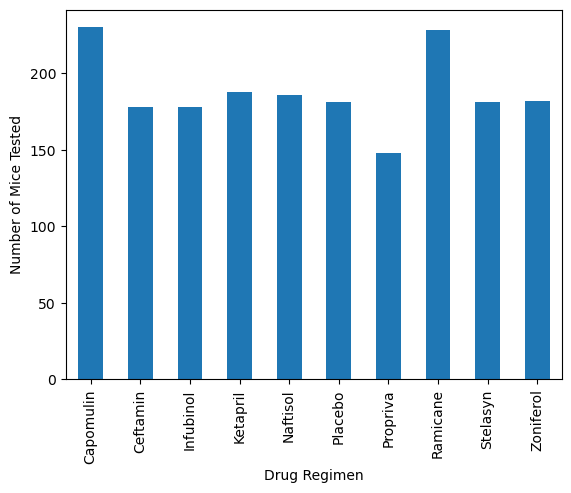

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_med = cleandf.groupby(["Drug Regimen"])["Timepoint"].count()
pplot = mice_med.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


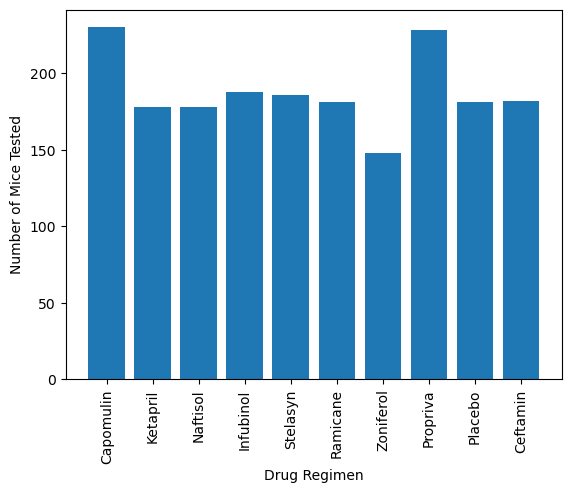

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = cleandf["Drug Regimen"].drop_duplicates()
xaxis = np.arange(0,len(drug)) 
tickl = [x for x in xaxis]

plt.bar(xaxis,mice_med)
plt.xticks(tickl,drug,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

<AxesSubplot:ylabel='Sex'>

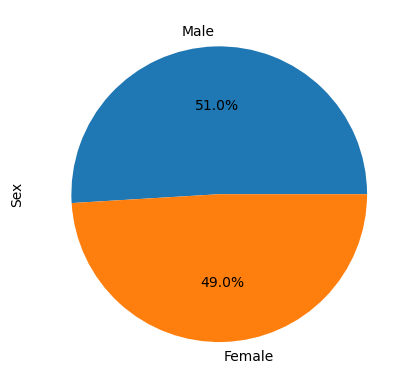

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = cleandf["Sex"].value_counts()

sex.plot(kind = "pie",autopct="%1.1f%%")


<function matplotlib.pyplot.show(close=None, block=None)>

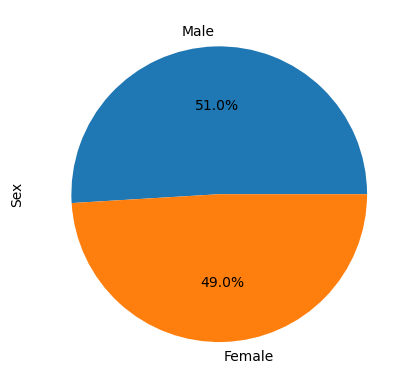

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = ["Male","Female"]

plt.pie(sex, labels = label , autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


df = cleandf.groupby(["Mouse ID"])["Timepoint"].max()

finaldf = pd.merge(cleandf,df,how = "right", on = ["Mouse ID","Timepoint"] )
finaldf



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatment=["Capomulin","Ramicane","Infubinol","Ceftamin"]
    
# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []
for med in treatment:
    tumor = finaldf.loc[finaldf["Drug Regimen"] == med,"Tumor Volume (mm3)"]
    tumorvol.append(tumor)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor.quantile([.25,.75])
    low = quartiles[.25]
    high =quartiles[.75]  
    IQR = high - low
  
    lowbound = low - (1.5*IQR)
    highbound = high + (1.5*IQR)

    outliers = tumor.loc[(tumor < lowbound) | (tumor > highbound)]
    print(f"{med}, the outliers are: {outliers}")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


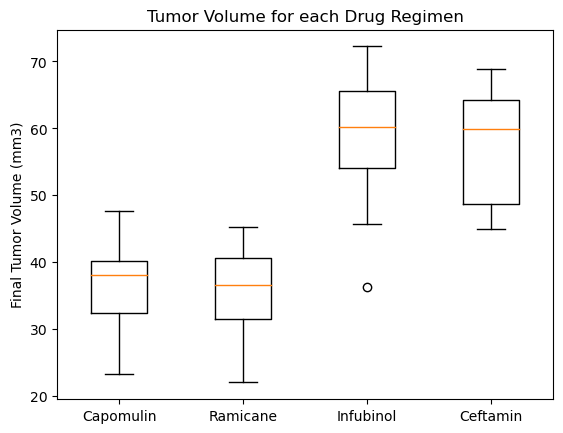

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for each Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumorvol, labels=treatment)


plt.show()

## Line and Scatter Plots

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = cleandf[cleandf["Drug Regimen"] == "Capomulin"] 


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

